In [47]:
from sklearn.ensemble import IsolationForest
import pandas as pd

In [48]:
# from google.colab import files
# files.upload()

In [49]:
df = pd.read_csv("thyroid_cancer_risk_data.csv")

In [50]:
df.head()

,Patient_ID,Age,Gender,Country,Ethnicity,Family_History,Radiation_Exposure,Iodine_Deficiency,Smoking,Obesity,Diabetes,TSH_Level,T3_Level,T4_Level,Nodule_Size,Thyroid_Cancer_Risk,Diagnosis
0,1,66,Male,Russia,Caucasian,No,Yes,No,No,No,No,9.37,1.67,6.16,1.08,Low,Benign
1,2,29,Male,Germany,Hispanic,No,Yes,No,No,No,No,1.83,1.73,10.54,4.05,Low,Benign
2,3,86,Male,Nigeria,Caucasian,No,No,No,No,No,No,6.26,2.59,10.57,4.61,Low,Benign
3,4,75,Female,India,Asian,No,No,No,No,No,No,4.10,2.62,11.04,2.46,Medium,Benign
4,5,35,Female,Germany,African,Yes,Yes,No,No,No,No,9.10,2.11,10.71,2.11,High,Benign


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212691 entries, 0 to 212690
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Patient_ID           212691 non-null  int64  
 1   Age                  212691 non-null  int64  
 2   Gender               212691 non-null  object 
 3   Country              212691 non-null  object 
 4   Ethnicity            212691 non-null  object 
 5   Family_History       212691 non-null  object 
 6   Radiation_Exposure   212691 non-null  object 
 7   Iodine_Deficiency    212691 non-null  object 
 8   Smoking              212691 non-null  object 
 9   Obesity              212691 non-null  object 
 10  Diabetes             212691 non-null  object 
 11  TSH_Level            212691 non-null  float64
 12  T3_Level             212691 non-null  float64
 13  T4_Level             212691 non-null  float64
 14  Nodule_Size          212691 non-null  float64
 15  Thyroid_Cancer_Ri

In [52]:
X = df.select_dtypes(include=['number'])

In [59]:
clf = IsolationForest(contamination = 0.1, random_state = 42)

In [60]:
y_pred = clf.fit_predict(X)
df["anomaly"] = (y_pred == -1)
print(df["anomaly"].value_counts())

anomaly
False    191422
True      21269
Name: count, dtype: int64


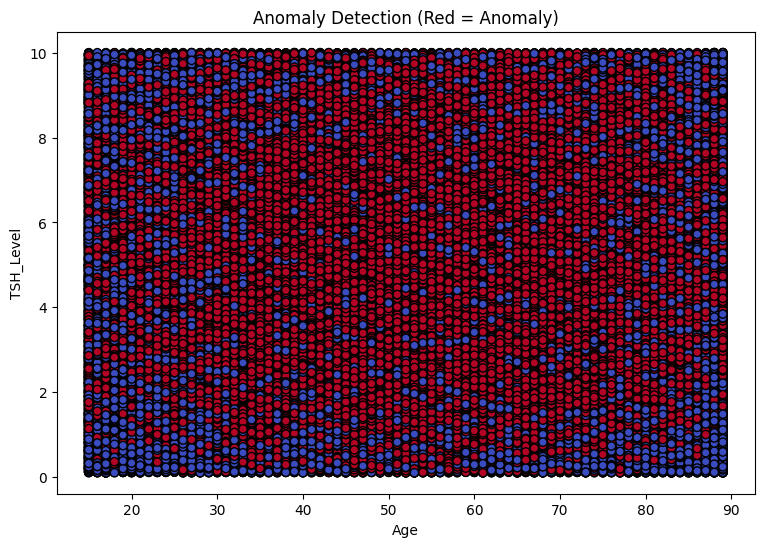

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.scatter(df["Age"], df["TSH_Level"], c=y_pred, cmap="coolwarm", edgecolor="k")
plt.xlabel("Age")
plt.ylabel("TSH_Level")
plt.title("Anomaly Detection (Red = Anomaly)")
plt.show()